# Notebook destinado a segunda parte do PP1 da disciplina de RNA 2020.1

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Importando o dataset limpo

> Formas alternativas de leitura do dataset do github

In [8]:
#pd.read_csv('https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AMHWGQNWN4HALQAJZ5OP2HC7H7CDS')
#.read_csv('https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AMHWGQPMBW2HL4RB3VNPKOC7H7CHE', encoding='ISO-8859-1', sep=';')

In [9]:
# adicionei o link do rep do github para acesso direto ao csv de lá
df_dataset = pd.read_csv('/content/dataset_limpo_covid19_manaus.csv')
df_dataset

,idade,sexo,bairro,conclusao,dt_notificacao,tipo_teste
0,25,F,ADRIANOPOLIS,Recuperado,20/03/2020,RT-PCR
1,41,F,BETANIA,Recuperado,27/03/2020,RT-PCR
2,37,M,CIDADE NOVA,Recuperado,27/04/2020,TESTE RÁPIDO - ANTICORPO
3,44,M,SAO JORGE,Recuperado,27/04/2020,TESTE RÁPIDO - ANTICORPO
4,27,F,COLONIA TERRA NOVA,Recuperado,24/04/2020,TESTE RÁPIDO - ANTICORPO
...,...,...,...,...,...,...
6355,14,F,DA PAZ,Recuperado,25/06/2020,TESTE RÁPIDO - ANTÍGENO
6356,5,F,REDENCAO,Recuperado,18/06/2020,TESTE RÁPIDO - ANTÍGENO
6357,70,F,DOM PEDRO I,Recuperado,02/06/2020,TESTE RÁPIDO - ANTÍGENO
6358,68,M,JORGE TEIXEIRA,Recuperado,01/06/2020,RT-PCR


In [10]:
df_dataset.groupby(['sexo']).count()

,idade,bairro,conclusao,dt_notificacao,tipo_teste
sexo,,,,,
F,3605,3605,3605,3605,3605
M,2755,2755,2755,2755,2755


In [11]:
df_dataset.sexo.value_counts()

F    3605
M    2755
Name: sexo, dtype: int64

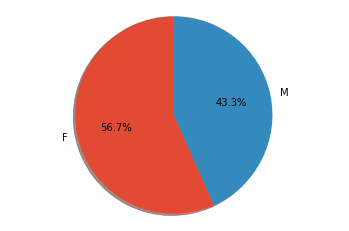

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'F', 'M'

sizes = df_dataset.sexo.value_counts()

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

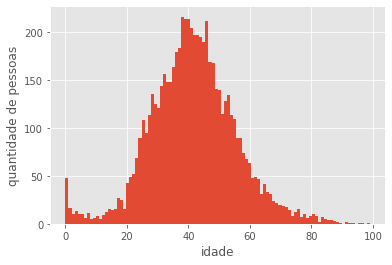

In [23]:
x = df_dataset.idade.values
plt.hist(x, density=False, bins=100)
plt.ylabel('quantidade de pessoas')
plt.xlabel('idade')

plt.show()

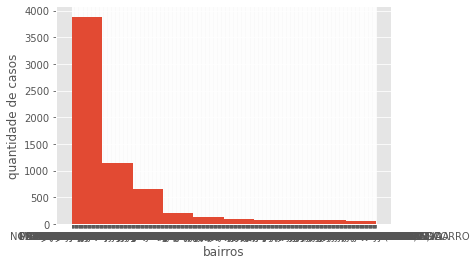

In [14]:
#1.Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. 
#Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

x = df_dataset.bairro.values
plt.hist(x, density=False, bins=10)
plt.ylabel('quantidade de casos')
plt.xlabel('bairros')

plt.show()


In [15]:
df_dataset.groupby(['bairro'], sort=False).count()

,idade,sexo,conclusao,dt_notificacao,tipo_teste
bairro,,,,,
ADRIANOPOLIS,125,125,125,125,125
BETANIA,52,52,52,52,52
CIDADE NOVA,296,296,296,296,296
SAO JORGE,91,91,91,91,91
COLONIA TERRA NOVA,76,76,76,76,76
...,...,...,...,...,...
PAQUE 10,1,1,1,1,1
RIO TARUMA-MIRIM,1,1,1,1,1
RIO NEGRO,3,3,3,3,3


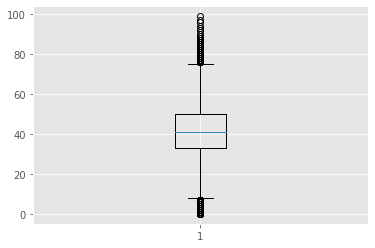

In [22]:
#2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?
x = df_dataset.idade.values
df_dataset.groupby(['sexo']).count()
plt.boxplot(x)

plt.show()


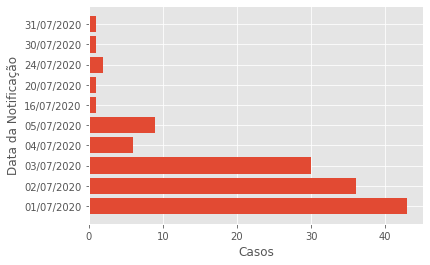

In [17]:
#3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias na base de dados.
dates = df_dataset

#datas transformadas pro formato Ano-Mês-Dia
dates['dt_notificacao'] = pd.to_datetime(dates['dt_notificacao'], dayfirst=True)

#datas ordenadas
dates = dates.sort_values(by='dt_notificacao')

#obetenção do número de casos
dates_cases = dates.groupby(['dt_notificacao']).size()

n = dates_cases.size
n = n-10

cases = dates_cases[n:].values

casos = []

for i in cases:
  casos.append(i)

#salvando as 10 datas
dates = dates.groupby(['dt_notificacao']).head(1)
date = dates.dt_notificacao.values


datas = []

for i in range(len(date)-10,len(date)):
  datas.append(date[i])

#Transformando as datas para o formato dia/mês/ano
for i in range(0,len(datas)):
  data = pd.to_datetime(str(datas[i])) 
  datas[i] = data.strftime('%d/%m/%Y')

#Plotando o gráfico
plt.barh(datas, casos)

plt.ylabel('Data da Notificação')
plt.xlabel('Casos')
plt.show()

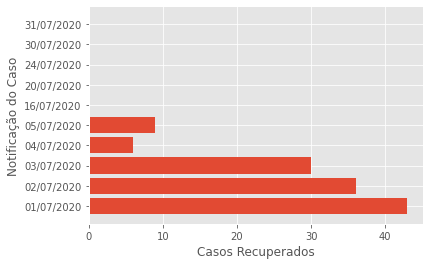

In [18]:
#4. Repita o gráfico anterior considerando o número de casos recuperado;

dates = df_dataset

#datas transformadas pro formato Ano-Mês-Dia
dates['dt_notificacao'] = pd.to_datetime(dates['dt_notificacao'], dayfirst=True)

#datas ordenadas
dates = dates.sort_values(by='dt_notificacao')

#obetenção do número de casos
dates_cases = dates.groupby(['dt_notificacao','conclusao']).size()

n = dates_cases.size
n = n-10

cases = dates_cases[n:].values

casos = []

for i in cases:
  casos.append(i)


#obtendo status da recuperacao
conclusao = []
for i in dates.conclusao:
  conclusao.append(i)

tam = len(conclusao)-10
conclusao = conclusao[tam:]

#obter quantidade de recuperados
df_casos_recuperados = dates.groupby(['dt_notificacao','conclusao']).size()
df_casos_recuperados

qtde_conclusoes = []

for i in df_casos_recuperados:
  qtde_conclusoes.append(i)

qtde_conclusoes = qtde_conclusoes[len(qtde_conclusoes)-10:]

#salvando as 10 datas
dates = dates.groupby(['dt_notificacao','conclusao']).head(1)
date = dates.dt_notificacao.values

#salvando as 10 datas
dates = dates.groupby(['dt_notificacao']).head(1)
date = dates.dt_notificacao.values


datas = []

for i in range(len(date)-10,len(date)):
  datas.append(date[i])

#Transformando as datas para o formato dia/mês/ano
for i in range(0,len(datas)):
  data = pd.to_datetime(str(datas[i])) 
  datas[i] = data.strftime('%d/%m/%Y')

df_index_conclusoes = dates.conclusao

index_casos_recuperados = []

for i in df_index_conclusoes:
  index_casos_recuperados.append(i)

tam2 = len(index_casos_recuperados)-10
index_casos_recuperados = index_casos_recuperados[tam2:]

label_recuperado = []
for i in range(0,10):
  if (index_casos_recuperados[i]=="Recuperado"):
    label_recuperado.append(qtde_conclusoes[i])
  else:
    label_recuperado.append(0)

#Plotando o gráfico
plt.barh(datas, label_recuperado)

plt.ylabel('Notificação do Caso')
plt.xlabel('Casos Recuperados')
plt.show()





Text(0.5, 0, 'idades')

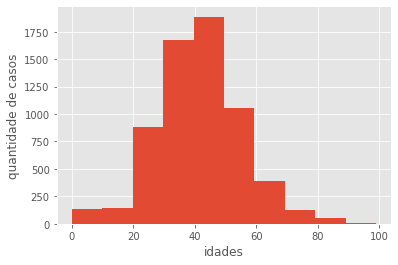

In [19]:
#5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, 
#considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);

x = df_dataset.idade.values
plt.hist(x, density=False, bins=10)
plt.ylabel('quantidade de casos')
plt.xlabel('idades')
#plt.xticks()

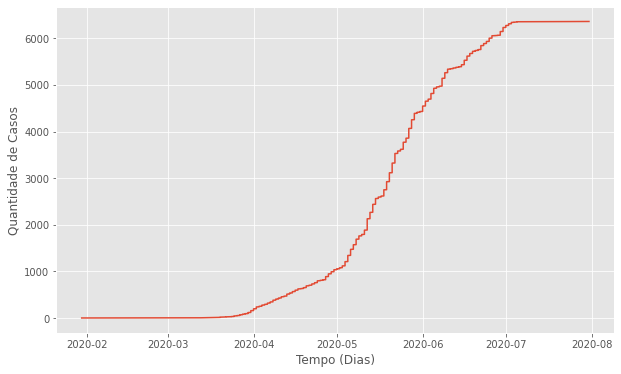

In [20]:
#6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

#ordenar as datas
dates = df_dataset

#datas transformadas pro formato Ano-Mês-Dia
dates['dt_notificacao'] = pd.to_datetime(dates['dt_notificacao'], dayfirst=True)

#datas ordenadas
dates = dates.sort_values(by='dt_notificacao')

date = dates.dt_notificacao.values

# casos
datas = []


for i in range(0,len(date)):
  datas.append(date[i])

casos = []
for i in range(0,len(datas)):
  casos.append(1)

for i in range(0,len(datas)):
  if (i+1<len(datas)):
    casos[i+1] = casos[i] + casos[i+1]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(datas,casos,label="casos")
ax.set_xlabel('Tempo (Dias)')
ax.set_ylabel('Quantidade de Casos')

plt.show()

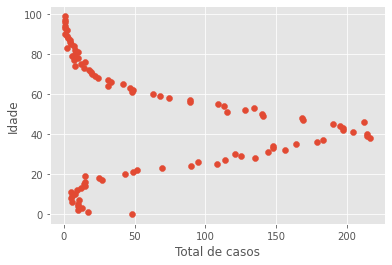

In [21]:
#7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado
#para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível
#observar alguma tendência?

data = df_dataset.groupby(['idade']).size()
y = data.index
x = data.values

plt.scatter(x,y)
plt.ylabel('Idade')
plt.xlabel('Total de casos')
plt.show()